# 볼린저 밴드

1. 파일 로드
2. 결측치와 이상치를 제거
3. 시간, 종가만의 데이터프레임을 생성
4. 이동 평균선 : 데이터 20개의 평균을 구해서 새로운 파생변수 대입
5. 상단 밴드 : 이동 평균선 + (2 * 데이터 20개의 표준편차)
6. 하단 밴드 : 이동 평균선 - (2 * 데이터 20개의 표준편차)
7. 구매 상태를 확인하는 파생변수 생성
8. 구매 상태 입력
9. 수익률 계산

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


In [3]:
df = pd.read_csv('../230331/230403/230404/csv/GM.csv', index_col = 'Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-11-18,35.000000,35.990002,33.889999,34.189999,27.027195,457044300
2010-11-19,34.150002,34.500000,33.110001,34.259998,27.082527,107842000
2010-11-22,34.200001,34.480000,33.810001,34.080002,26.940243,36650600
2010-11-23,33.950001,33.990002,33.189999,33.250000,26.284130,31170200
2010-11-24,33.730000,33.799999,33.220001,33.480000,26.465942,26138000


In [13]:
df = df.loc[~df.isin((np.nan, np.inf, -np.inf)).any(axis='columns')]
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-11-18,35.000000,35.990002,33.889999,34.189999,27.027195,457044300
2010-11-19,34.150002,34.500000,33.110001,34.259998,27.082527,107842000
2010-11-22,34.200001,34.480000,33.810001,34.080002,26.940243,36650600
2010-11-23,33.950001,33.990002,33.189999,33.250000,26.284130,31170200
2010-11-24,33.730000,33.799999,33.220001,33.480000,26.465942,26138000
...,...,...,...,...,...,...
2019-06-18,36.380001,36.779999,36.139999,36.700001,36.700001,8226900
2019-06-19,37.000000,37.470001,36.750000,36.779999,36.779999,10884800
2019-06-20,37.150002,37.310001,36.490002,36.959999,36.959999,8639700


In [14]:
# 시간과 종가만의 데이터프레임 생성

price_df = df[['Adj Close']]
price_df.head(1)

,Adj Close
Date,
2010-11-18,27.027195


In [21]:
# 이동 평균선 : 종가 데이터 20개의 평균값

price_df['Center'] = price_df['Adj Close'].rolling(20).mean()
price_df
    

C:\Users\user\AppData\Local\Temp\ipykernel_4368\745325942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['Center'] = price_df['Adj Close'].rolling(20).mean()


,Adj Close,Center
Date,,
2010-11-18,27.027195,NaN
2010-11-19,27.082527,NaN
2010-11-22,26.940243,NaN
2010-11-23,26.284130,NaN
2010-11-24,26.465942,NaN
...,...,...
2019-06-18,36.700001,35.249369
2019-06-19,36.779999,35.251553
2019-06-20,36.959999,35.340899


In [28]:
# ub, lb 두개의 파생변수 생성

price_df['ub'] = price_df['Center'] + (2 * price_df['Adj Close'].rolling(20).std())
price_df['lb'] = price_df['Center'] - (2 * price_df['Adj Close'].rolling(20).std())

C:\Users\user\AppData\Local\Temp\ipykernel_4368\3526696645.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['ub'] = price_df['Center'] + (2 * price_df['Adj Close'].rolling(20).std())
C:\Users\user\AppData\Local\Temp\ipykernel_4368\3526696645.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df['lb'] = price_df['Center'] - (2 * price_df['Adj Close'].rolling(20).std())


In [29]:
price_df

,Adj Close,Center,ub,lb
Date,,,,
2010-11-18,27.027195,NaN,NaN,NaN
2010-11-19,27.082527,NaN,NaN,NaN
2010-11-22,26.940243,NaN,NaN,NaN
2010-11-23,26.284130,NaN,NaN,NaN
2010-11-24,26.465942,NaN,NaN,NaN
...,...,...,...,...
2019-06-18,36.700001,35.249369,37.239697,33.259041
2019-06-19,36.779999,35.251553,37.248834,33.254271
2019-06-20,36.959999,35.340899,37.478352,33.203445


In [32]:
test_df = price_df.tail(100)

<Axes: xlabel='Date'>

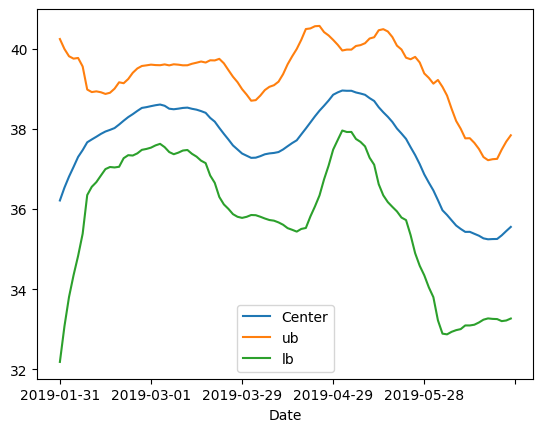

In [33]:
test_df.drop('Adj Close', axis = 1).plot()

In [34]:
start = "2011-01-02"
price_df2 = price_df.loc[start:]
price_df2.head(2)

,Adj Close,Center,ub,lb
Date,,,,
2011-01-03,29.295927,27.433909,29.236157,25.631661
2011-01-04,29.959959,27.569085,29.692262,25.445907


In [36]:
# 거래 내역이라는 파생변수
price_df2['trade'] = ''
price_df2

C:\Users\user\AppData\Local\Temp\ipykernel_4368\3836144337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df2['trade'] = ''


,Adj Close,Center,ub,lb,trade
Date,,,,,
2011-01-03,29.295927,27.433909,29.236157,25.631661,
2011-01-04,29.959959,27.569085,29.692262,25.445907,
2011-01-05,30.094337,27.703075,30.105109,25.301041,
2011-01-06,30.750460,27.878961,30.626324,25.131599,
2011-01-07,30.813686,28.086072,31.064934,25.107210,
...,...,...,...,...,...
2019-06-18,36.700001,35.249369,37.239697,33.259041,
2019-06-19,36.779999,35.251553,37.248834,33.254271,
2019-06-20,36.959999,35.340899,37.478352,33.203445,


### 구매 내역 추가
 - 조건
 1. 상단밴드보다 종가가 높은 경우
    현재 구매 상태이면 
       - 매도 trade = ""
    구매 상태가 아니면
       - 아무 행동도 하지 않는다. trade = ''

2. 하단밴드보다 종가가 낮은 경우
    
    현재 구매상태이면 
       - 아무 행동도 하지 않는다. trade = 'buy'
    
    현재 구매상태가 아니면
       - 매수 trade = 'buy'

3. 하단 밴드와 상단 밴드 사이에 종가가 존재하는 경우
   
   현재 구매상태이면
       - 아무 행동도 하지 않는다. trade = 'buy'
   
   구매상태가 아니면
       - 아무 행동도 하지 않는다. trade = ''
   

In [41]:
for i in price_df2.index:
    
    # 상단 밴드보다 종가가 높은 경우
    if price_df2.loc[i, 'Adj Close'] > price_df2.loc[i, 'ub']:
        
        # 현재 구매 상태이면
        if price_df2.shift(1).loc[i, 'trade'] == 'buy':
            
            #매도
            price_df2.loc[i, 'trade'] = ''
        else :
            price_df2.loc[i, 'trade'] = ''
    
    #하단 밴드보다 종가가 낮은 경우
    elif price_df2.loc[i, 'Adj Close'] < price_df2.loc[i, 'lb']:
        
        # 현재 구매상태이면 
        if price_df2.shift(1).loc[i, 'trade'] == 'buy':
            
            # 유지(매수)
            price_df2.loc[i, 'trade'] = "buy"
        else:
            price_df2.loc[i, 'trade'] = "buy"
    
    # 하단 밴드와 상단 밴드 사이에 종가가 존재하는 경우
    else:
        if price_df2.shift(1).loc[i, 'trade'] == 'buy':
            price_df2.loc[i, 'trade'] = 'buy'
        else:
            price_df2.lo1c[i, 'trade'] = ""
                    

In [42]:
price_df2['trade'].value_counts()

trade
buy    1130
       1002
Name: count, dtype: int64

### 수익률 계산
1. 구매한 날의 종가 
  - 전날의 trade 항목의 값이 ''이고 현재의 trade가 'buy'인 날의 종가

2. 판매한 날의 종가
  - 전날의 trade가 'buy' ,  현재의 trade가 ''인 날의 종가

3.수익률 계산
  - (판매가격 - 구매가격) / 구매가격 + 1

4. 구매 가격과 판매 가격을 초기화

5. 여러개의 수익률 발생

6. 발생한 수익률로 누적 수익률 계산

In [47]:
rtn = 1.0
price_df2['return'] = 1
buy = 0.0
sell = 0.0

for i in price_df2.index :
    # 구매가를 출력
    if (price_df2.shift(1).loc[i, 'trade'] == "") & (price_df2.loc[i, "trade"] == 'buy'):
        buy = price_df2.loc[i, 'Adj Close']
        print('진입일:', i, '구매가격:' , buy)
    
    # 판매가를 출력
    elif (price_df2.shift(1).loc[i,'trade'] =='buy') & (price_df2.loc[i,'trade'] == ""):
        sell =  price_df2.loc[i, 'Adj Close']
        rtn = (sell - buy) / buy + 1
        price_df2.loc[i, 'return'] = rtn
        print('판매일 :', i, '판매가격:', sell, '수익률:', rtn)
    
    #구매가, 판매가를 초기화
    if price_df2.loc[i, 'trade'] =='':
        buy = 0.0
        sell = 0.0

C:\Users\user\AppData\Local\Temp\ipykernel_4368\689111764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_df2['return'] = 1


진입일: 2011-02-02 구매가격: 28.205038
판매일 : 2011-04-05 판매가격: 25.983728 수익률: 0.9212442117610337
진입일: 2011-06-02 구매가격: 23.398802
판매일 : 2011-07-07 판매가격: 25.137901 수익률: 1.0743242752342619
진입일: 2011-07-27 구매가격: 22.244669
판매일 : 2012-01-05 판매가격: 17.525387 수익률: 0.7878466072028314
진입일: 2012-03-06 구매가격: 19.43049
판매일 : 2012-04-02 판매가격: 21.15378 수익률: 1.0886899918633035
진입일: 2012-04-09 구매가격: 19.1301
판매일 : 2012-08-07 판매가격: 16.142014 수익률: 0.8438018619871303
진입일: 2013-02-20 구매가격: 21.42255
판매일 : 2013-03-20 판매가격: 23.082602 수익률: 1.0774908682673165
진입일: 2013-06-20 구매가격: 25.738686
판매일 : 2013-09-10 판매가격: 29.248499 수익률: 1.1363633326114626
진입일: 2013-10-03 구매가격: 27.896749
판매일 : 2013-10-30 판매가격: 29.430317 수익률: 1.0549730006173836
진입일: 2014-01-16 구매가격: 30.8295
판매일 : 2014-03-05 판매가격: 29.659563 수익률: 0.9620513793606772
진입일: 2014-03-13 구매가격: 26.948151
판매일 : 2014-06-04 판매가격: 29.125372 수익률: 1.080792964237138
진입일: 2014-07-24 구매가격: 28.74103
판매일 : 2014-11-17 판매가격: 26.210114 수익률: 0.9119406646177957
진입일: 2015-04-07 구매가격: 29.48309

In [55]:
# 누적 수익률
acc_rtn = 1.0

for i in price_df2.index :
    rtn = price_df2.loc[i,'return'] 
    acc_rtn *= rtn
    price_df2.loc[i,'acc_rtn'] = acc_rtn

print('누적 수익률:', acc_rtn)

누적 수익률: 1.383990965152143


In [56]:
price_df2.iloc[400:500]

,Adj Close,Center,ub,lb,trade,return,acc_rtn
Date,,,,,,,
2012-08-03,15.841622,15.463367,16.088070,14.838664,buy,1.000000,0.848899
2012-08-06,15.691425,15.448743,16.034625,14.862860,buy,1.000000,0.848899
2012-08-07,16.142014,15.473248,16.131447,14.815050,,0.843802,0.716303
2012-08-08,16.110388,15.492220,16.201580,14.782861,,1.000000,0.716303
2012-08-09,16.323826,15.544393,16.336778,14.752008,,1.000000,0.716303
...,...,...,...,...,...,...,...
2012-12-20,21.612268,20.131269,21.264959,18.997579,,1.000000,0.716303
2012-12-21,21.596457,20.214666,21.518225,18.911108,,1.000000,0.716303
2012-12-24,21.865231,20.310712,21.800205,18.821220,,1.000000,0.716303
